<a href="https://colab.research.google.com/github/PavelStelmakhV/hw310-keras-fasion-mnist/blob/main/keras_fasion_mnist_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from keras import layers
from keras import regularizers
from keras import callbacks
from keras import initializers
from keras.layers import BatchNormalization

In [74]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [75]:
# x_train = x_train.reshape(60000, 784).astype('float32') / 255
# x_test = x_test.reshape(10000, 784).astype('float32') / 255
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

# Перемешаем тренировочные данные
# train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
# train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [76]:
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [77]:
w_init = initializers.glorot_normal()
b_init = initializers.Zeros()

In [78]:
model = tf.keras.Sequential()

drop_out = 0.2
lern_rat = 0.001
neurons = 128

model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dropout(0.35))

model.add(layers.Dense(neurons * 1, activation='relu', kernel_initializer=w_init, bias_initializer=b_init)) #, kernel_regularizer=regularizers.l2(lern_rat)
model.add(BatchNormalization())
# model.add(layers.Dropout(drop_out))
model.add(layers.Dense(neurons * 2, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dropout(drop_out))

model.add(layers.Dense(neurons * 4, activation='tanh'))
model.add(BatchNormalization())
model.add(layers.Dropout(drop_out * 1.5))

# model.add(layers.Dense(neurons * 8, activation='tanh'))
# model.add(BatchNormalization())
# model.add(layers.Dropout(drop_out * 2))

model.add(layers.Dense(10, activation='softmax'))

In [79]:
model.compile(#optimizer='adam',
              optimizer='adamax',
              # optimizer='nadam',
              # optimizer='rmsprop',
              # optimizer='sgd',
              # optimizer='adadelta',
              # loss='binary_crossentropy',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']) # sparse_categorical_accuracy

1/1 [==============================] - 0s 123ms/step


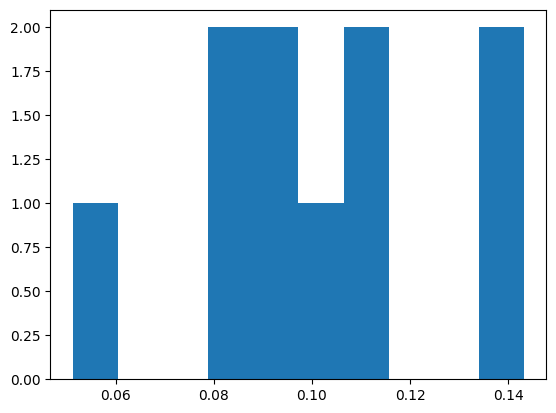

In [80]:
x = np.random.random((1, 28, 28))
a = model.predict(x)
_ = plt.hist(np.transpose(a))

In [81]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [82]:
callback = callbacks.EarlyStopping(monitor='val_loss',
                                   patience=20,
                                   restore_best_weights=True,
                                   )

In [ ]:
# model.fit(train_images, train_labels, epochs=20)
history = model.fit(x_train, y_train,
                    epochs=300,
                    batch_size=128,
                    callbacks=[callback],
                    verbose=1, #многословие
                    validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nTest accuracy:', test_acc)

Epoch 1/300
391/391 [==============================] - 9s 17ms/step - loss: 0.8178 - accuracy: 0.7133 - val_loss: 0.5168 - val_accuracy: 0.8125
Epoch 2/300
391/391 [==============================] - 7s 17ms/step - loss: 0.6088 - accuracy: 0.7807 - val_loss: 0.4493 - val_accuracy: 0.8400
Epoch 3/300
391/391 [==============================] - 7s 18ms/step - loss: 0.5467 - accuracy: 0.8019 - val_loss: 0.4288 - val_accuracy: 0.8403
Epoch 4/300
391/391 [==============================] - 5s 13ms/step - loss: 0.4999 - accuracy: 0.8174 - val_loss: 0.3934 - val_accuracy: 0.8559
Epoch 5/300
391/391 [==============================] - 6s 16ms/step - loss: 0.4711 - accuracy: 0.8264 - val_loss: 0.3880 - val_accuracy: 0.8560
Epoch 6/300
391/391 [==============================] - 6s 14ms/step - loss: 0.4507 - accuracy: 0.8332 - val_loss: 0.3704 - val_accuracy: 0.8650
Epoch 7/300
391/391 [==============================] - 5s 13ms/step - loss: 0.4338 - accuracy: 0.8405 - val_loss: 0.3638 - val_accuracy:

In [ ]:
print('\nhistory dict:', list(history.history.keys()))

In [ ]:
result = model.evaluate(x_test, y_test)
print(result)

In [ ]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['loss']) + 1)

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.clf()
plt.figure(figsize=(10, 5))
val_acc_values = history_dict['accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(x_test)

In [ ]:
predictions[0]

In [ ]:
model.summary()